Libraries Import & Setup

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset

In [73]:
# Load dataset.
student_price_dataset = pd.read_csv("/content/student_dataset.csv")

Exploratory Data Analysis

In [74]:
# Print dataset.
print(student_price_dataset)

     Student_ID  Attendance (%)  Internal Test 1 (out of 40)  \
0         S1000              84                           30   
1         S1001              91                           24   
2         S1002              73                           29   
3         S1003              80                           36   
4         S1004              84                           31   
...         ...             ...                          ...   
1995      S2995              82                           31   
1996      S2996              78                           38   
1997      S2997              78                           30   
1998      S2998              82                           29   
1999      S2999              97                           32   

      Internal Test 2 (out of 40)  Assignment Score (out of 10)  \
0                              36                             7   
1                              38                             6   
2                             

In [75]:
# Print number of rows and columns in dataset
student_price_dataset.shape

(2000, 7)

In [76]:
# Print the first 5 rows from our dataset.
student_price_dataset.head()

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
0,S1000,84,30,36,7,3,72
1,S1001,91,24,38,6,3,56
2,S1002,73,29,26,7,3,56
3,S1003,80,36,35,7,3,74
4,S1004,84,31,37,8,3,66


In [77]:
# Describe dataset (count, mean, std, min, etc.).
student_price_dataset.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000


In [78]:
#Check for missing values
student_price_dataset.isnull().sum()

,0
Student_ID,0
Attendance (%),0
Internal Test 1 (out of 40),0
Internal Test 2 (out of 40),0
Assignment Score (out of 10),0
Daily Study Hours,0
Final Exam Marks (out of 100),0


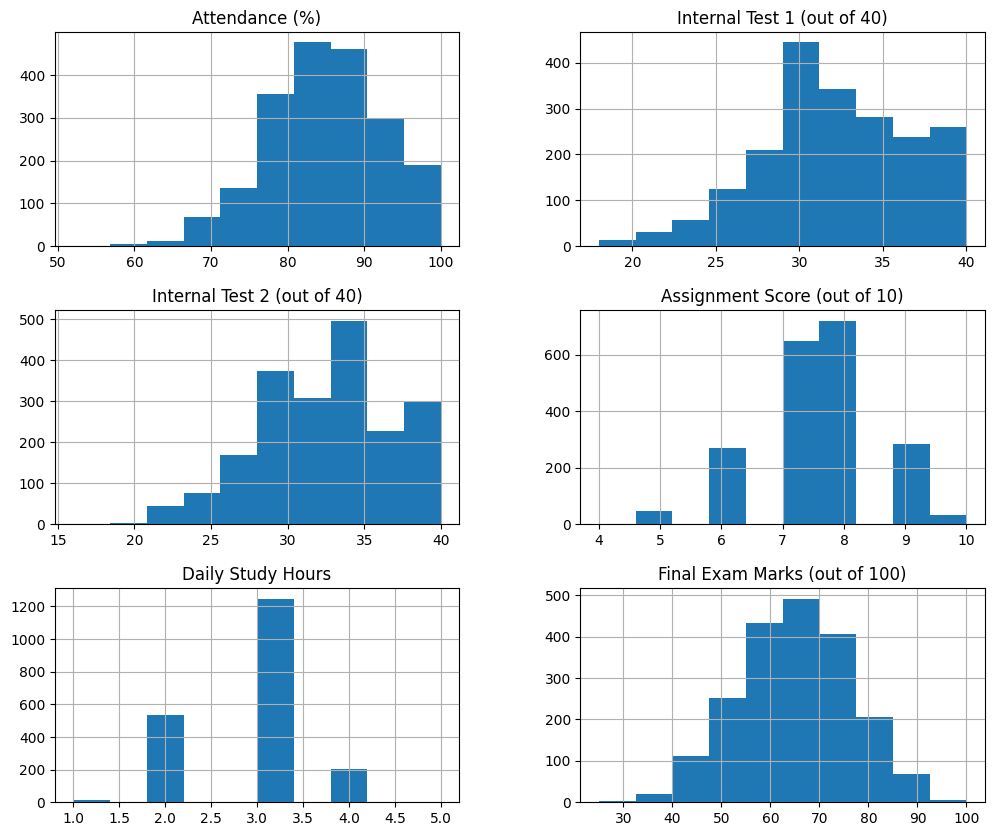

In [79]:
# Histogram for numerical features
student_price_dataset.hist(figsize=(12,10))
plt.show()

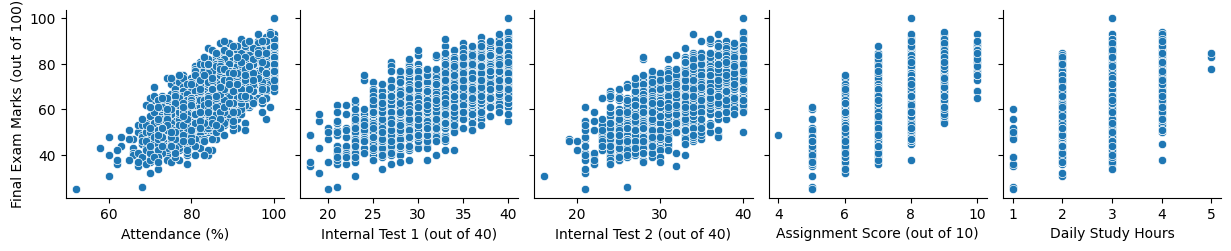

In [80]:
# Pairplot: especially useful for checking correlation between features and target,
# and also for visually identifying outliers
sns.pairplot(
    student_price_dataset,
    y_vars='Final Exam Marks (out of 100)',
    x_vars=['Attendance (%)', 'Internal Test 1 (out of 40)',
            'Internal Test 2 (out of 40)', 'Assignment Score (out of 10)',
            'Daily Study Hours']
)
plt.show()

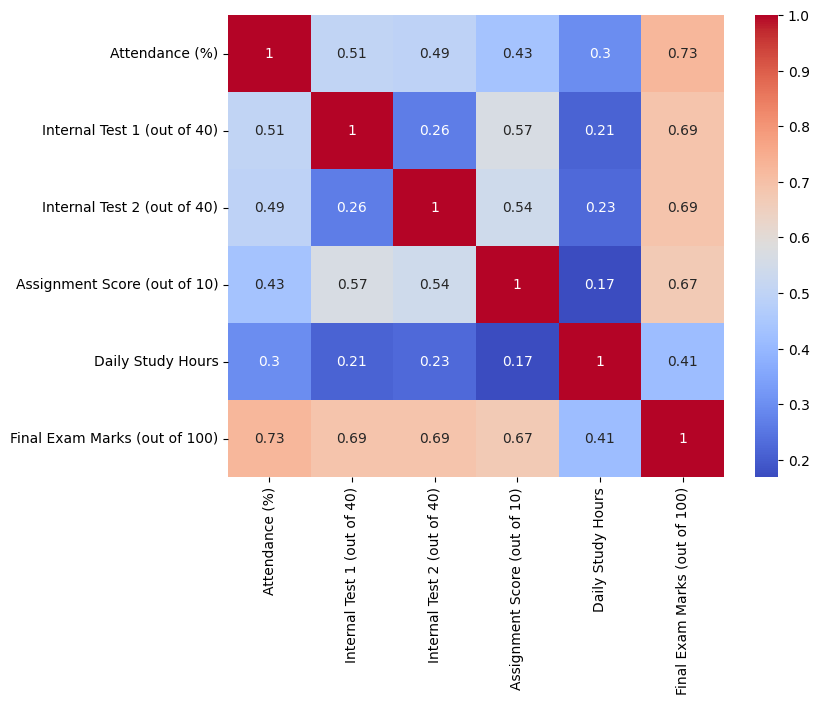

In [81]:
numeric_df = student_price_dataset.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

Preprocessing

In [82]:
# Splitting data and target
X = student_price_dataset.drop(['Final Exam Marks (out of 100)', 'Student_ID'], axis=1)
Y = student_price_dataset['Final Exam Marks (out of 100)']

In [83]:
# Print X(data) and Y(target)
print(X)
print(Y)

      Attendance (%)  Internal Test 1 (out of 40)  \
0                 84                           30   
1                 91                           24   
2                 73                           29   
3                 80                           36   
4                 84                           31   
...              ...                          ...   
1995              82                           31   
1996              78                           38   
1997              78                           30   
1998              82                           29   
1999              97                           32   

      Internal Test 2 (out of 40)  Assignment Score (out of 10)  \
0                              36                             7   
1                              38                             6   
2                              26                             7   
3                              35                             7   
4                           

In [84]:
# Splitting data into Train data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [85]:
# Print Train data and Test data's number of rows and columns
print(X.shape , X_train.shape, X_test.shape)

(2000, 5) (1600, 5) (400, 5)


Model Training & Prediction & Model Evaluation

In [86]:
# Loading the model
model = CatBoostRegressor(
    iterations=2500,
    learning_rate=0.02,
    depth=7,
    l2_leaf_reg=12,
    random_strength=2.0,
    bagging_temperature=1.1,
    border_count=128,
    loss_function='RMSE',
    random_seed=42,
    verbose=False
)

In [87]:
# Training the model with X data (X_train, Y_train).
model.fit(X_train, Y_train)

In [88]:
# Accuracy for prediction on train data
train_predict = model.predict(X_train)

In [89]:
print(train_predict)

[65.77996273 55.66691452 54.62358196 ... 50.91587933 50.3524862
 74.03354891]


In [90]:
# R2 score
r2_train = r2_score(Y_train, train_predict)

# Mean Absolute Error
mae_train = mean_absolute_error(Y_train, train_predict)

# Mean Squared Error
mse_train = mean_squared_error(Y_train, train_predict)

In [91]:
print("R2 Score (on train data): ", r2_train)
print("Mean Absolute Error (on train data): ", mae_train)
print("Mean Squared Error (on train data): ", mse_train)

R2 Score (on train data):  0.9051810848410629
Mean Absolute Error (on train data):  2.715739784842474
Mean Squared Error (on train data):  12.329240572430747


In [92]:
# Accuracy for prediction on test data
test_predict = model.predict(X_test)

In [93]:
print(test_predict)

[48.9381096  85.39523715 72.28274682 57.67015467 52.52455488 76.97189966
 65.55841433 52.11430766 76.40961699 42.89910019 51.27861263 56.97132466
 82.48906076 60.62954308 73.30772196 78.68156841 67.63732048 60.70428285
 64.33996663 68.85860516 48.28372857 63.72123461 65.4943353  60.55446582
 69.45276471 46.41255994 68.84518223 61.03510817 57.63859629 58.12357647
 76.4267089  61.93537427 76.23119179 90.6092084  57.22209453 59.34102838
 70.98346845 64.7610741  69.64317328 46.99854883 66.12000709 57.13994762
 73.55688597 76.65380497 67.62585325 73.36617142 55.29423131 83.72618596
 55.23707426 52.69074892 63.63871902 69.08970693 53.60409865 86.38427227
 76.13452784 73.81111925 66.37022359 81.26789473 65.57117573 66.86497655
 60.58616246 62.62056835 58.64944487 47.12843333 59.66414698 69.23412015
 77.34192321 67.37245588 79.5624851  66.30141686 66.19456943 63.54446734
 67.98334475 70.82971245 55.00977176 68.02432998 71.82817367 48.03824101
 63.04691834 47.28727175 73.21489376 69.2585256  80

In [94]:
# R2 score
r2_test = r2_score(Y_test, test_predict)

# Mean Absolute Error
mae_test = mean_absolute_error(Y_test, test_predict)

# Mean Squared Error
mse_test = mean_squared_error(Y_test, test_predict)

In [95]:
print("R2 Score (on test data): ", r2_test)
print("Mean Absolute Error (on test data): ", mae_test)
print("Mean Squared Error (on test data): ", mse_test)

R2 Score (on test data):  0.81269160766553
Mean Absolute Error (on test data):  3.8435792680724523
Mean Squared Error (on test data):  22.979461842573624


Final Results & Comparison

In [96]:
# Schedule for comparing Train and Test results
train_metrics = {
    'R2 Score': 0.905181,
    'Mean Absolute Error': 2.715740,
    'Mean Squared Error': 12.329241
}

test_metrics = {
    'R2 Score': 0.812692,
    'Mean Absolute Error': 3.843579,
    'Mean Squared Error': 22.979462
}

metrics_df = pd.DataFrame({
    'Metric': list(train_metrics.keys()),
    'Train': list(train_metrics.values()),
    'Test': list(test_metrics.values())
})

metrics_df

,Metric,Train,Test
0,R2 Score,0.905181,0.812692
1,Mean Absolute Error,2.715740,3.843579
2,Mean Squared Error,12.329241,22.979462


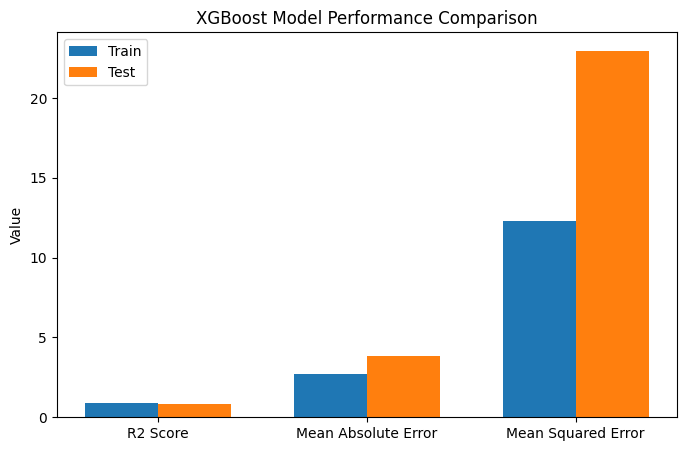

In [97]:
# The bar chart visually compares Train and Test model performance.
metrics = list(train_metrics.keys())
train_vals = list(train_metrics.values())
test_vals = list(test_metrics.values())

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, train_vals, width, label='Train')
rects2 = ax.bar(x + width/2, test_vals, width, label='Test')


ax.set_ylabel('Value')
ax.set_title('XGBoost Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


plt.show()